In [2]:
# import  h5py
# import pandas as pd
# import numpy as np
# import STAGATE
# import scanpy as sc
# import matplotlib.pyplot as plt
# import os
# import sys

# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
# import rpy2.robjects as robjects

import pandas as pd
import numpy as np
import sys
from anndata import AnnData
import scanpy as sc
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
import spatialcorr

In [5]:
adata1 = sc.read_10x_mtx("/QRISdata/Q1851/Andrew_C/Metabolomics/data_objects/anndata/")

In [ ]:
#coords = pd.read_csv("/QRISdata/Q1851/Andrew_C/Metabolomics/data_objects/anndata/coords.csv")

In [6]:
coords_int = pd.read_csv("/QRISdata/Q1851/Andrew_C/Metabolomics/data_objects/anndata/coords_int.csv")

In [7]:
coords_int.index = adata1.obs_names

In [8]:
#coords.index = adata1.obs_names

In [9]:
ar = coords_int[['x', 'y']].values

In [10]:
adata1.obsm["spatial"] = ar

In [18]:
import sys
sys.path.append('../../cloned_packages/SmartGate/automatic_peak_picking')

from automatic_peak_picking_2D import automatic_2D_peak_picking

In [21]:
? automatic_2D_peak_picking

Signature:
 automatic_2D_peak_picking(
    adata,
    ol_mass,
    num_marker=1300,
    r=1.4,
    alpha=0.2,
    n_epochs=1000,
    pre_resolutation=0.2,
    hidden_dims=[256, 10],
    rank_method='wilcoxon',
    cluster_method='louvain',
    k_class_first=5,
    k_class=10,
    k_resolutation=0.2,
)
Docstring: <no docstring>
File:      /scratch/user/uqacause/cloned_packages/SmartGate/automatic_peak_picking/automatic_peak_picking_2D.py
Type:      function

In [33]:
f = h5py.File('/QRISdata/Q1851/Andrew_C/Metabolomics/pig_2D.h5', 'r')
data=pd.DataFrame((f['data']))

mass=np.array(f['mass']).reshape(-1,)
spatial=np.array(f['spatial'])

adata=sc.AnnData(data)
adata.obsm["spatial"]=spatial

adata.var_names=mass.astype(str)

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [60]:
adata.obsm["spatial"]

array([[72,  1],
       [73,  1],
       [74,  1],
       ...,
       [83, 65],
       [84, 65],
       [83, 66]])

In [92]:
adata1

AnnData object with n_obs × n_vars = 10736 × 18168
    var: 'gene_ids'
    obsm: 'spatial'

ifpicking=  1


---Begin to automatic peak picking!-----
First iter begin!
------Calculating spatial graph...
The graph contains 84542 edges, 10736 cells.
7.8746 neighbors per cell on average.
Size of Input:  (10736, 18168)
------Pre-clustering using louvain with resolution=0.10


/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/STAGATE-1.0.1-py3.9.egg/STAGATE/Train_STAGATE.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell1'] = prune_G_df['Cell1'].map(cells_id_tran)
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/STAGATE-1.0.1-py3.9.egg/STAGATE/Train_STAGATE.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell2'] = prune_G_df['Cell2'].map(cells_id_tran)


------Pruning the graph...
84542 edges before pruning.
47766 edges after pruning.


100%|██████████| 1000/1000 [38:18<00:00,  2.30s/it]
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encounter

------Calculating spatial graph...
The graph contains 84542 edges, 10736 cells.
7.8746 neighbors per cell on average.
Size of Input:  (10736, 4048)
------Pre-clustering using louvain with resolution=0.10


/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/STAGATE-1.0.1-py3.9.egg/STAGATE/Train_STAGATE.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell1'] = prune_G_df['Cell1'].map(cells_id_tran)
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/STAGATE-1.0.1-py3.9.egg/STAGATE/Train_STAGATE.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell2'] = prune_G_df['Cell2'].map(cells_id_tran)


------Pruning the graph...
84542 edges before pruning.
47772 edges after pruning.


100%|██████████| 1000/1000 [09:59<00:00,  1.67it/s]
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encounter

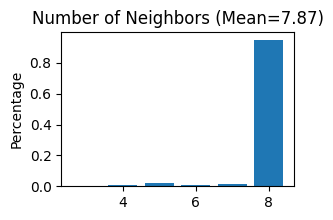

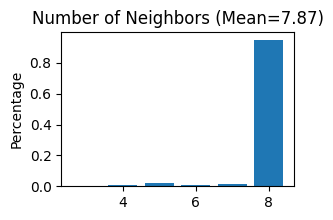

In [95]:
adata1_1=automatic_2D_peak_picking(adata1,18168,num_marker=1250,cluster_method='leiden',r=1.7,
                                 k_class_first=5,k_class=10,alpha=0.1,pre_resolutation=0.1)

ifpicking=  1


---Begin to automatic peak picking!-----
First iter begin!
------Calculating spatial graph...
The graph contains 38736 edges, 4959 cells.
7.8113 neighbors per cell on average.
Size of Input:  (4959, 10200)
------Pre-clustering using louvain with resolution=0.10


/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/STAGATE-1.0.1-py3.9.egg/STAGATE/Train_STAGATE.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell1'] = prune_G_df['Cell1'].map(cells_id_tran)
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/STAGATE-1.0.1-py3.9.egg/STAGATE/Train_STAGATE.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell2'] = prune_G_df['Cell2'].map(cells_id_tran)


------Pruning the graph...
38736 edges before pruning.
34806 edges after pruning.


100%|██████████| 1000/1000 [12:06<00:00,  1.38it/s]


------Calculating spatial graph...
The graph contains 38736 edges, 4959 cells.
7.8113 neighbors per cell on average.
Size of Input:  (4959, 5439)
------Pre-clustering using louvain with resolution=0.10


/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/STAGATE-1.0.1-py3.9.egg/STAGATE/Train_STAGATE.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell1'] = prune_G_df['Cell1'].map(cells_id_tran)
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/STAGATE-1.0.1-py3.9.egg/STAGATE/Train_STAGATE.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell2'] = prune_G_df['Cell2'].map(cells_id_tran)


------Pruning the graph...
38736 edges before pruning.
34856 edges after pruning.


100%|██████████| 1000/1000 [06:53<00:00,  2.42it/s]


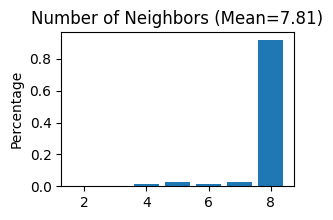

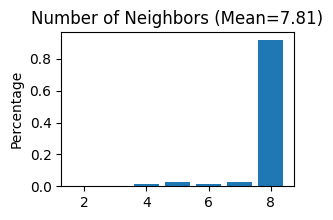

In [75]:
adata2=automatic_2D_peak_picking(adata,10200,num_marker=1250,cluster_method='leiden',r=1.7,
                                 k_class_first=5,k_class=10,alpha=0.1,pre_resolutation=0.1)

In [80]:
adata2

AnnData object with n_obs × n_vars = 4959 × 5439
    obs: 'expression_louvain_label', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'Spatial_Net', 'pca', 'neighbors', 'louvain', 'leiden', 'rank_genes_groups', 'mclust_colors'
    obsm: 'spatial', 'X_pca', 'STAGATE'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [77]:
adata2.uns["mclust_colors"]=['#1f77b4','#d62728','#17becf','#aa40fc','#ff7f0e',
'#b5bd61','#279e68','#8c564b','#aec7e8','#e377c2',]

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'SmartGate'}, xlabel='spatial1', ylabel='spatial2'>

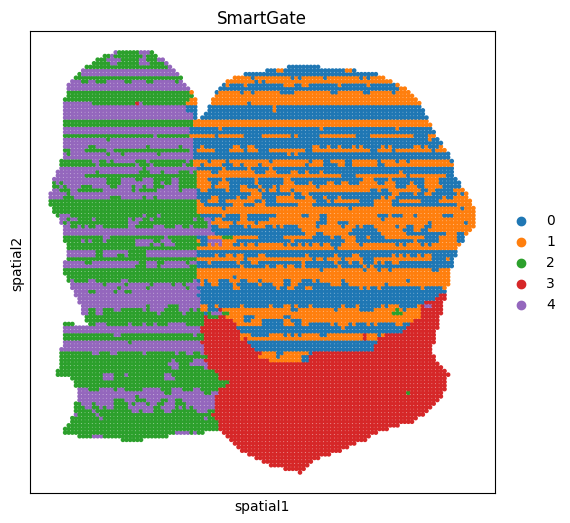

In [98]:
plt.rcParams["figure.figsize"] = (6, 6)

sc.pl.embedding(adata1_1, basis='spatial',color='leiden',show=False,title='SmartGate',s=44)